<a href="https://colab.research.google.com/github/Juanpatino1/Cluster/blob/main/wardhierarchicalclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape original: (569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_wor

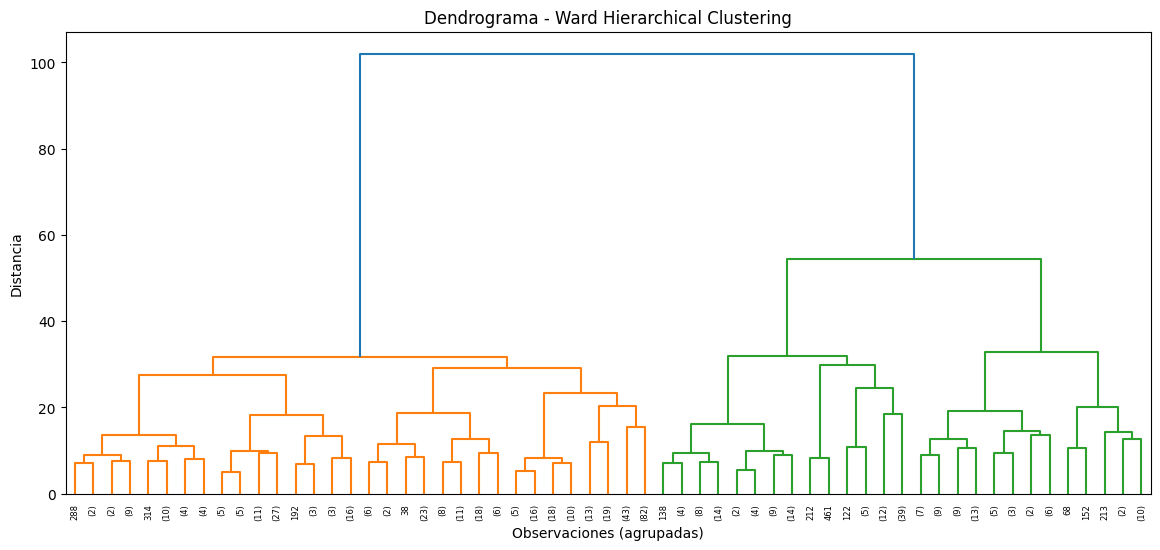


🔹 Tabla cluster Ward vs diagnóstico real:
diagnosis       B    M
ward_cluster          
1             337   48
2              20  164

🔹 Proporciones dentro de cada cluster:
diagnosis            B         M
ward_cluster                    
1             0.875325  0.124675
2             0.108696  0.891304


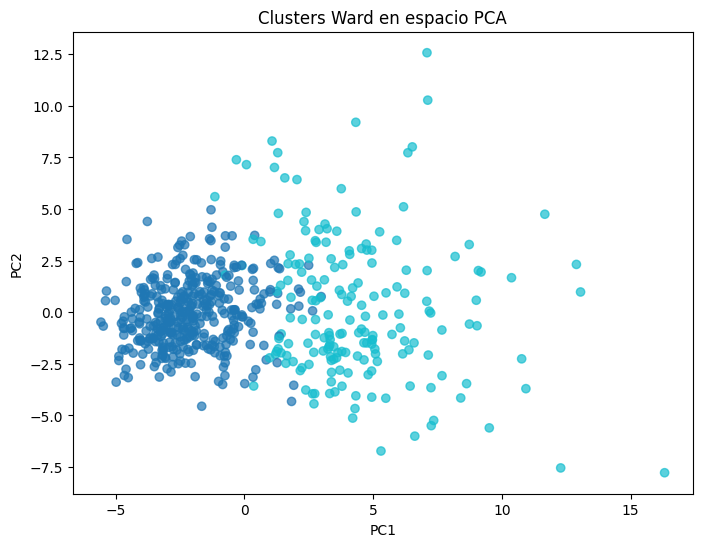

In [3]:
# ============================================
# 🌳 WARD HIERARCHICAL CLUSTERING
#     con Breast Cancer Wisconsin Dataset
# ============================================

# 1️⃣ Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2️⃣ Cargar el dataset desde la ruta de Kaggle/Colab
# Ajusta 'path' si tu ruta es distinta
path = "/kaggle/input/breast-cancer-wisconsin-data"
df = pd.read_csv(path + "/data.csv")

print("Shape original:", df.shape)
print(df.head())

# 3️⃣ Eliminar columnas completamente vacías (como 'Unnamed: 32')
df = df.dropna(axis=1, how="all")
print("\nShape después de eliminar columnas vacías:", df.shape)
print(df.isna().sum())

# 4️⃣ Separar diagnóstico real y seleccionar variables para clustering
#    - y_true: diagnosis (B/M) → solo para evaluación, NO entra al clustering
#    - X: variables numéricas del tumor
y_true = df["diagnosis"]
X = df.drop(columns=["id", "diagnosis"])

print("\nColumnas usadas para clustering:")
print(X.columns)

# 5️⃣ Escalar las variables (muy importante para distancias)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nShape de X_scaled:", X_scaled.shape)

# 6️⃣ Crear el linkage jerárquico con método Ward
#    Ward intenta minimizar la varianza dentro de cada cluster
Z = linkage(X_scaled, method="ward")

# 7️⃣ Dibujar el dendrograma (truncado para que sea legible)
plt.figure(figsize=(14, 6))
dendrogram(
    Z,
    truncate_mode="level",  # muestra solo los últimos niveles
    p=5                      # número de niveles que se muestran
)
plt.title("Dendrograma - Ward Hierarchical Clustering")
plt.xlabel("Observaciones (agrupadas)")
plt.ylabel("Distancia")
plt.show()

# 8️⃣ Cortar el dendrograma en k clusters
#    Usamos k = 2 para compararlo con K-means y con B/M
k = 2
ward_labels = fcluster(Z, k, criterion="maxclust")

# Guardamos los clusters en el dataframe
df["ward_cluster"] = ward_labels

# 9️⃣ Comparar clusters Ward vs diagnóstico real
print("\n🔹 Tabla cluster Ward vs diagnóstico real:")
ct = pd.crosstab(df["ward_cluster"], y_true)
print(ct)

print("\n🔹 Proporciones dentro de cada cluster:")
print(pd.crosstab(df["ward_cluster"], y_true, normalize="index"))

# 1️⃣0️⃣ Visualizar los clusters de Ward en el espacio PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df["ward_cluster"],
    cmap="tab10",
    alpha=0.7
)
plt.title("Clusters Ward en espacio PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

